<a href="https://colab.research.google.com/github/adibhosn/EDA-LogisticRegression/blob/main/EDA%2BLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


# Carregando dados

In [2]:
# Carregar o dataset
df = pd.read_csv('/content/drive/MyDrive/startupdata.csv')

# Mostrar as primeiras linhas e informações do dataset
df


,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


# Drop de Colunas sem utilidade para o modelo

In [3]:
# Remover colunas desnecessárias
colunas_para_remover = ['Unnamed: 0', 'id', 'Unnamed: 6', 'name', 'object_id', 'zip_code', 'founded_at',
                        'closed_at', 'first_funding_at', 'last_funding_at', 'city', 'state_code', 'state_code.1', 'latitude', 'longitude',
                        'category_code', 'closed_at', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year']

df = df.drop(columns=colunas_para_remover)

In [4]:
#removendo colunas de Valores com datas por se tratarem de dados irrelevantes para a previsão,
#pois além de representarem datas antigas, a previsão não depende disso.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   labels             923 non-null    int64  
 1   relationships      923 non-null    int64  
 2   funding_rounds     923 non-null    int64  
 3   funding_total_usd  923 non-null    int64  
 4   milestones         923 non-null    int64  
 5   is_CA              923 non-null    int64  
 6   is_NY              923 non-null    int64  
 7   is_MA              923 non-null    int64  
 8   is_TX              923 non-null    int64  
 9   is_otherstate      923 non-null    int64  
 10  is_software        923 non-null    int64  
 11  is_web             923 non-null    int64  
 12  is_mobile          923 non-null    int64  
 13  is_enterprise      923 non-null    int64  
 14  is_advertising     923 non-null    int64  
 15  is_gamesvideo      923 non-null    int64  
 16  is_ecommerce       923 non

In [6]:
df.status.value_counts()

,count
status,
acquired,597
closed,326


In [7]:
# Transformando a coluna 'status' em booleana
df['status'] = df['status'].replace({'acquired': 1, 'closed': 0})
df['status'] = df['status'].astype(bool)

<ipython-input-7-e4350b4974dc>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['status'] = df['status'].replace({'acquired': 1, 'closed': 0})


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   labels             923 non-null    int64  
 1   relationships      923 non-null    int64  
 2   funding_rounds     923 non-null    int64  
 3   funding_total_usd  923 non-null    int64  
 4   milestones         923 non-null    int64  
 5   is_CA              923 non-null    int64  
 6   is_NY              923 non-null    int64  
 7   is_MA              923 non-null    int64  
 8   is_TX              923 non-null    int64  
 9   is_otherstate      923 non-null    int64  
 10  is_software        923 non-null    int64  
 11  is_web             923 non-null    int64  
 12  is_mobile          923 non-null    int64  
 13  is_enterprise      923 non-null    int64  
 14  is_advertising     923 non-null    int64  
 15  is_gamesvideo      923 non-null    int64  
 16  is_ecommerce       923 non

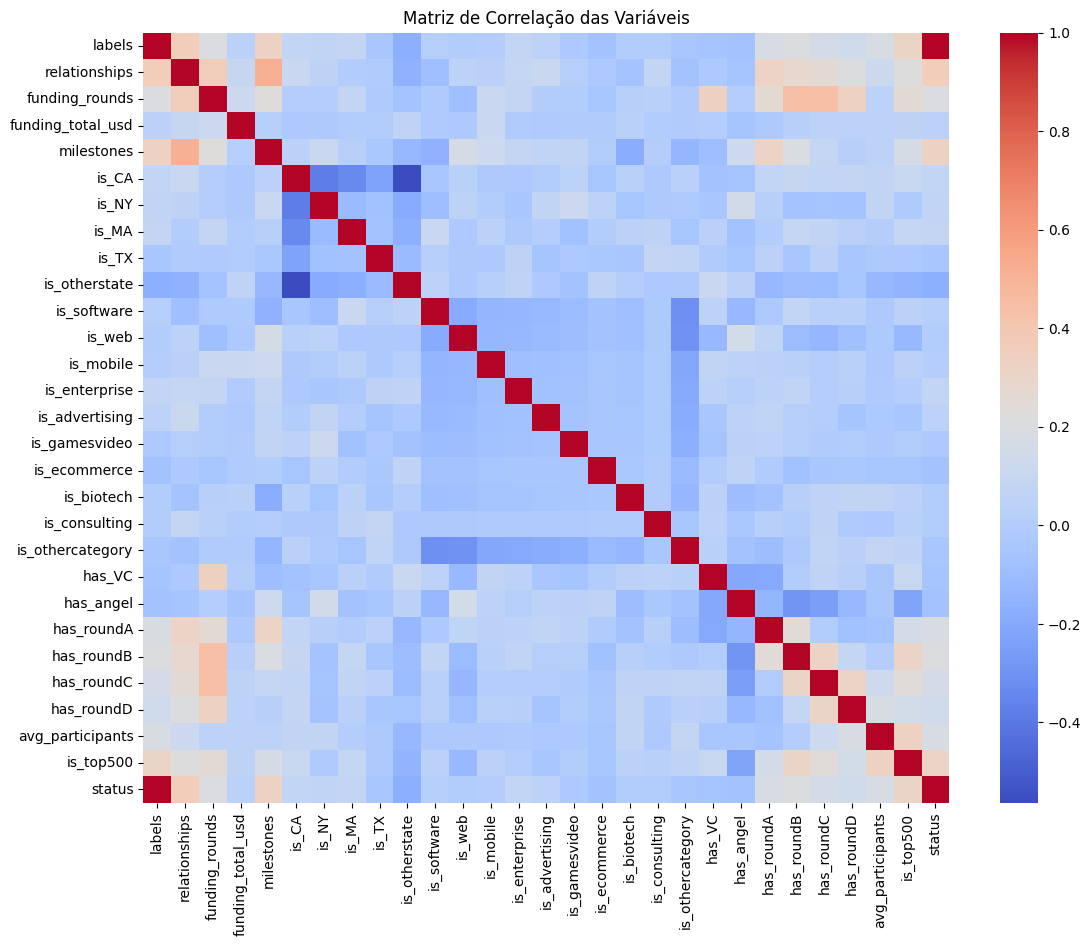

In [9]:
#plotando matriz de correlação
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Matriz de Correlação das Variáveis')
plt.show()

In [10]:
(df.status == df.labels).unique()

array([ True])

In [11]:
#as colunas "labels" e "status" são iguais.
#Colunas idênticas contêm a mesma informação, e manter ambas não proporciona nenhum benefício adicional para o aprendizado do modelo.

df.drop(columns=['labels'], inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   relationships      923 non-null    int64  
 1   funding_rounds     923 non-null    int64  
 2   funding_total_usd  923 non-null    int64  
 3   milestones         923 non-null    int64  
 4   is_CA              923 non-null    int64  
 5   is_NY              923 non-null    int64  
 6   is_MA              923 non-null    int64  
 7   is_TX              923 non-null    int64  
 8   is_otherstate      923 non-null    int64  
 9   is_software        923 non-null    int64  
 10  is_web             923 non-null    int64  
 11  is_mobile          923 non-null    int64  
 12  is_enterprise      923 non-null    int64  
 13  is_advertising     923 non-null    int64  
 14  is_gamesvideo      923 non-null    int64  
 15  is_ecommerce       923 non-null    int64  
 16  is_biotech         923 non

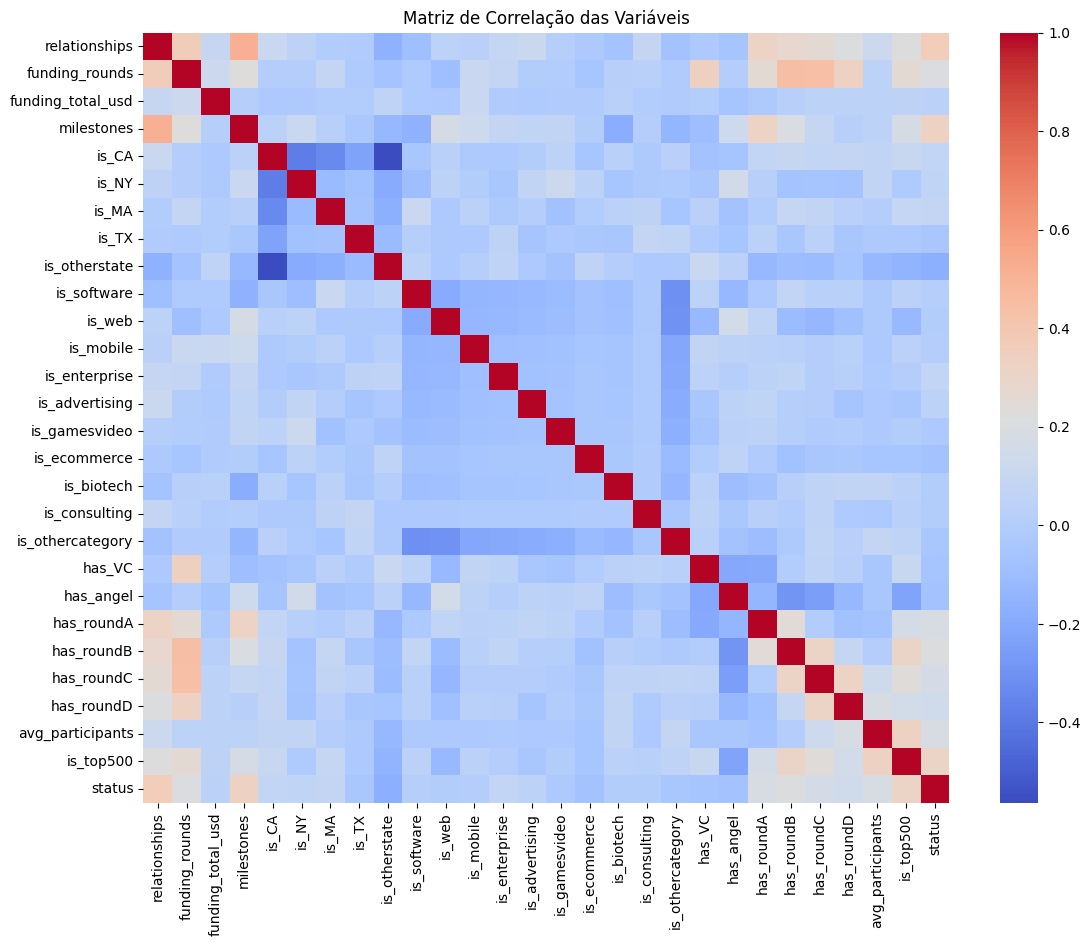

In [13]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Matriz de Correlação das Variáveis')
plt.show()

# Verificando a presença de outliers

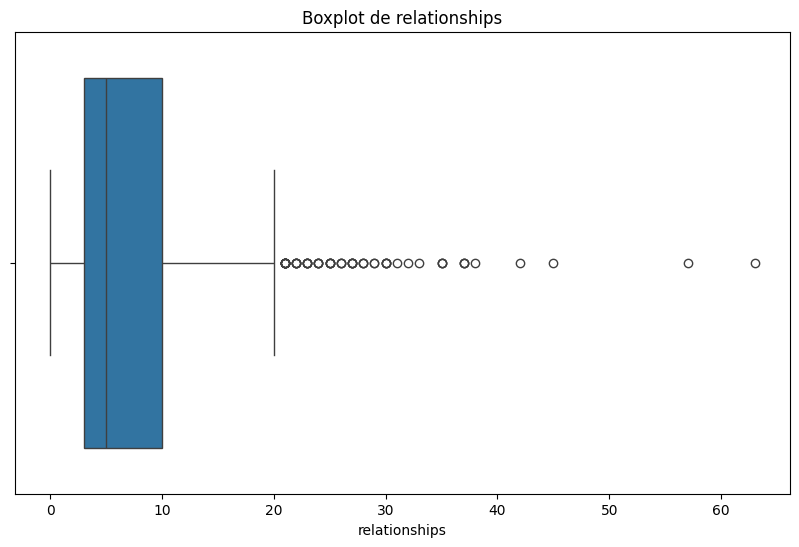

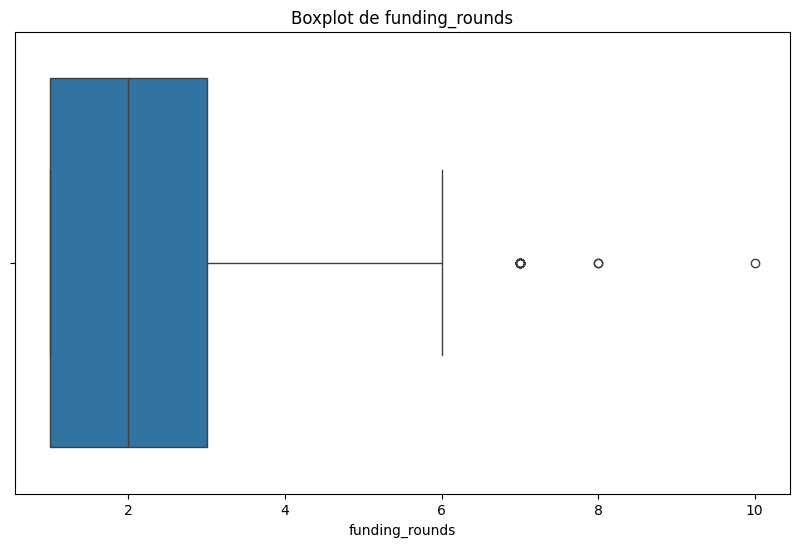

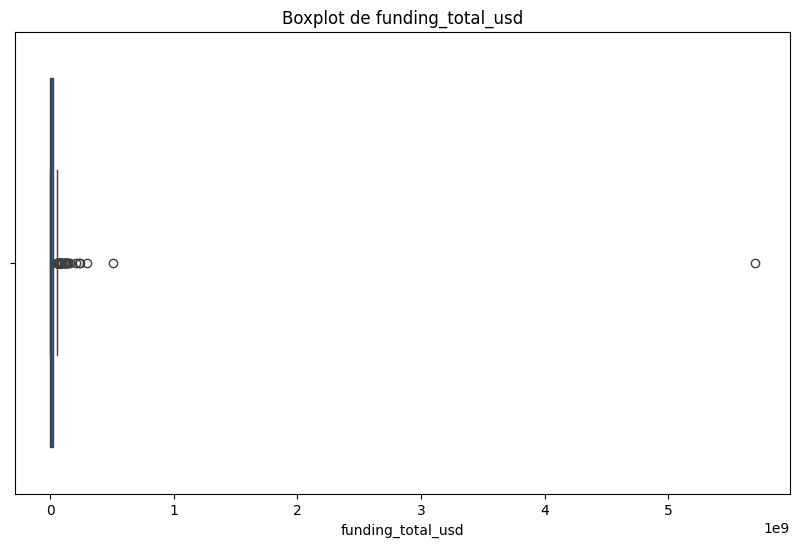

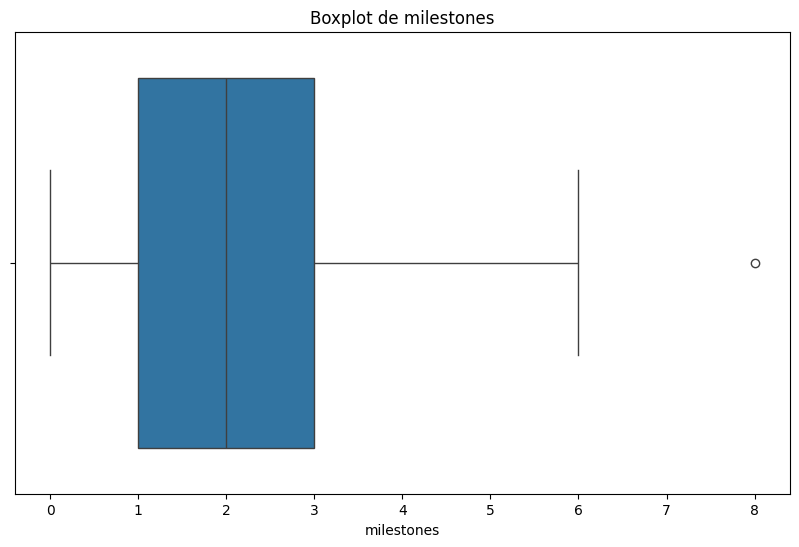

In [14]:
#features que podem ter outliers
colunas = ['relationships', 'funding_rounds', 'funding_total_usd', 'milestones']  # Substitua pelos nomes das suas colunas

# Plotar boxplot para cada coluna
for coluna in colunas:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[coluna])
    plt.title(f'Boxplot de {coluna}')
    plt.show()

# Removendo outliers usando intervalo interquartil (IQR)

In [15]:
# Função para remover outliers
def remover_outliers(df, colunas):
    for coluna in colunas:
        Q1 = df[coluna].quantile(0.25)
        Q3 = df[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Filtrar os dados dentro dos limites
        df = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]

    return df

# Remover os outliers
df = remover_outliers(df, colunas)

# Verificando novamente as features que haviam outliers

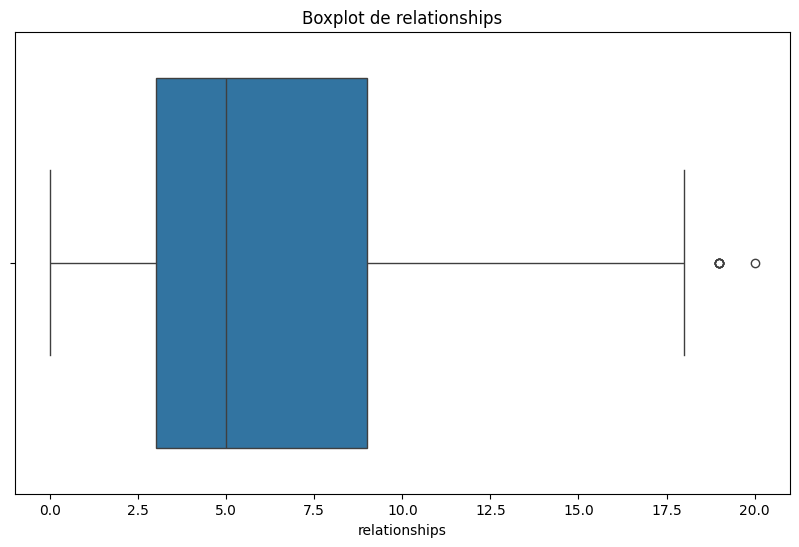

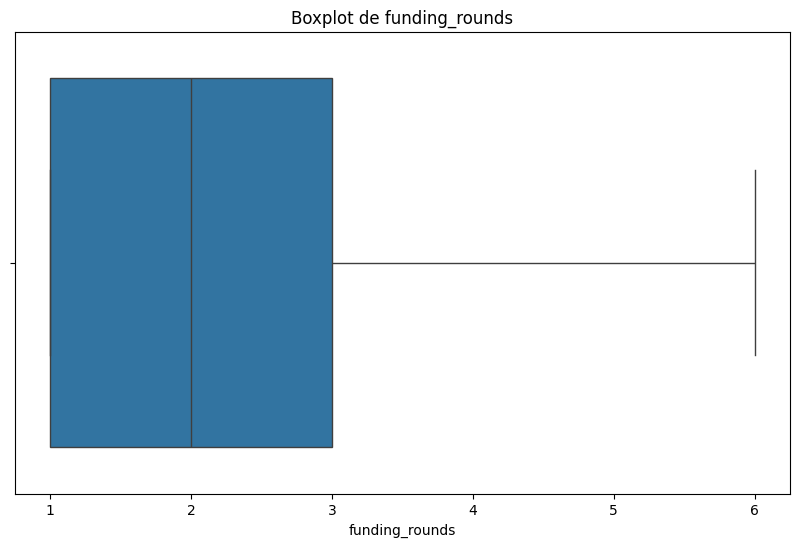

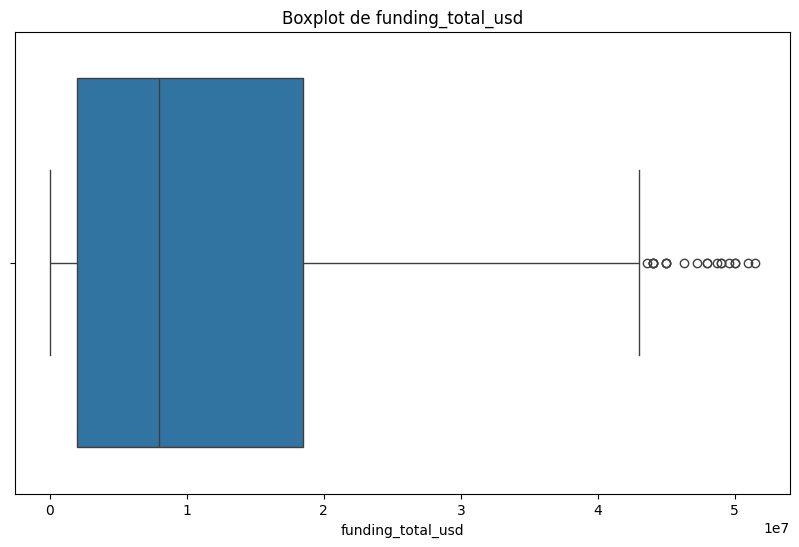

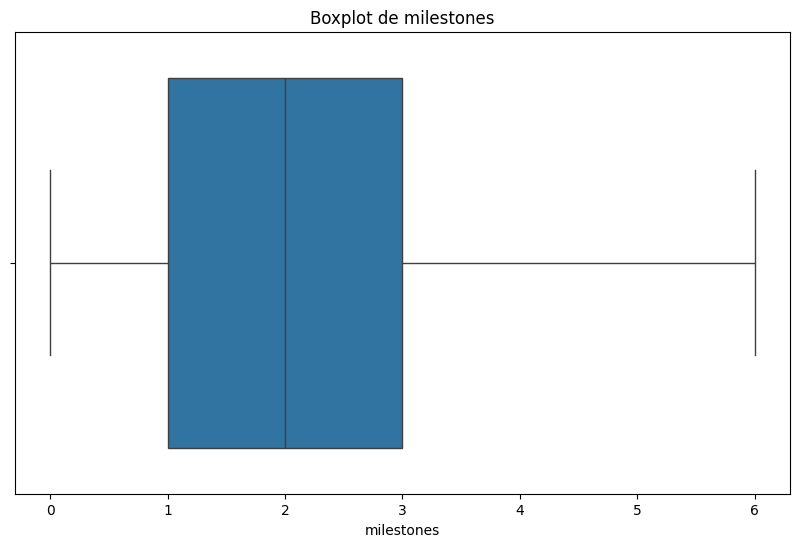

In [16]:
for coluna in colunas:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[coluna])
    plt.title(f'Boxplot de {coluna}')
    plt.show()

# Salvando DataFrame tratado para que possa ser usado no front-end

In [17]:
df.to_csv('df_certo_startups.csv', index = False)
verificando = pd.read_csv('df_certo_startups.csv')
verificando.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   relationships      794 non-null    int64  
 1   funding_rounds     794 non-null    int64  
 2   funding_total_usd  794 non-null    int64  
 3   milestones         794 non-null    int64  
 4   is_CA              794 non-null    int64  
 5   is_NY              794 non-null    int64  
 6   is_MA              794 non-null    int64  
 7   is_TX              794 non-null    int64  
 8   is_otherstate      794 non-null    int64  
 9   is_software        794 non-null    int64  
 10  is_web             794 non-null    int64  
 11  is_mobile          794 non-null    int64  
 12  is_enterprise      794 non-null    int64  
 13  is_advertising     794 non-null    int64  
 14  is_gamesvideo      794 non-null    int64  
 15  is_ecommerce       794 non-null    int64  
 16  is_biotech         794 non

In [18]:
teste = verificando.query('status == 1')
teste.funding_total_usd.mean()

np.float64(13174257.210204082)

In [19]:
teste.funding_total_usd.max()

51450000

# Verificando balanceamento da feature alvo

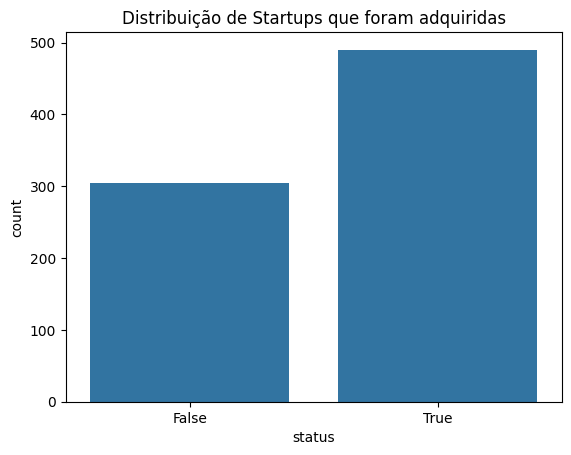

In [20]:
sns.countplot(x='status', data=df)
plt.title('Distribuição de Startups que foram adquiridas')
plt.show()

# Balanceamento dos dados

**Após verificar que a feature alvo, estava desbalanceada pesquisei maneiras de balancea-la. Devido a pequena quantidade de colunas do dataset, decidi por criar dados sintéticos. Essa equiparação é necessária para que o modelo não fique tendencioso**


In [21]:
from imblearn.over_sampling import SMOTE

# Aplicando o SMOTE nos dados
X = df.drop('status', axis=1)
y = df['status']



# Modelagem pré-treinamento

In [23]:
from sklearn.model_selection import train_test_split

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40, stratify=y)

# Seleção de Features
Como pode ser observado na matriz de correlação, há algumas features que possuem um alto grau de redundancia, portanto decidi por usar SelectKBest para selecionar as melhores features para o treinamento.

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif

# Criando a Pipeline com os passos desejados
pipeline = Pipeline([
    # Seleção de características
    ('select', SelectKBest(score_func=f_classif, k=2)),
    # Treinamento do modelo
    ('classification', LogisticRegression())
])

# Treinando a Pipeline
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

train_accuracy = accuracy_score(y_train, pipeline.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print("Acurácia no conjunto de treinamento:", train_accuracy)
print("Acurácia no conjunto de teste:", test_accuracy)


Acurácia no conjunto de treinamento: 0.7411764705882353
Acurácia no conjunto de teste: 0.7638190954773869


# Justificativa de uso algoritimo de seleção de features Kbest

SelectKBest permite a escolha as features mais relevantes para o modelo, o que é importante para melhorar a performance do mesmo. Ao usar o parâmetro f_classif, ele seleciona as variáveis baseadas no teste estatístico ANOVA F (Analysis of Variance).

# Justificativa de uso do modelo Regressão Logística


Escolhi a Regressão Logística porque ela modela diretamente a probabilidade de uma startup ser vendida usando uma função sigmoide, que transforma combinações lineares das features em valores entre 0 e 1, ideais para classificação binária. A lógica por trás do modelo é que ele calcula o logit (log das odds), permitindo interpretar como cada feature afeta a chance de venda. Como tenho poucas features, a Regressão Logística se ajusta bem, evitando o sobreajuste e preservando a interpretabilidade, especialmente com o uso de regularização que controla a complexidade do modelo.

# Avaliações do desempenho do modelo

**matriz de confusão**

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", cm)


Matriz de Confusão:
 [[ 49  27]
 [ 20 103]]


93: Verdadeiros Negativos (True Negatives - TN)
O número de casos em que o modelo previu corretamente a classe negativa (não vendida) e a verdade era negativa.

24: Falsos Positivos (False Positives - FP)
O número de casos em que o modelo previu a classe positiva (vendida) quando a verdade era negativa.

39: Falsos Negativos (False Negatives - FN)
O número de casos em que o modelo previu a classe negativa (não vendida) quando a verdade era positiva.

89: Verdadeiros Positivos (True Positives - TP)
O número de casos em que o modelo previu corretamente a classe positiva (vendida) e a verdade era positiva.

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Matriz de Confusão fornecida
cm = [[97, 20],
      [44, 84]]

# Extrair valores da matriz de confusão
TN, FP, FN, TP = cm[0][0], cm[0][1], cm[1][0], cm[1][1]

# Calcular métricas
accuracy = accuracy_score([0]*TN + [0]*FP + [1]*FN + [1]*TP, [0]*TN + [1]*FP + [1]*FN + [1]*TP)
precision = precision_score([0]*TN + [0]*FP + [1]*FN + [1]*TP, [0]*TN + [1]*FP + [1]*FN + [1]*TP)
recall = recall_score([0]*TN + [0]*FP + [1]*FN + [1]*TP, [0]*TN + [1]*FP + [1]*FN + [1]*TP)
f1 = f1_score([0]*TN + [0]*FP + [1]*FN + [1]*TP, [0]*TN + [1]*FP + [1]*FN + [1]*TP)

# Exibir resultados
print("Matriz de Confusão:")
print(cm)
print(f"Acurácia: {accuracy:.3f}")
print(f"Precisão: {precision:.3f}")
print(f"Sensibilidade: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")


Matriz de Confusão:
[[97, 20], [44, 84]]
Acurácia: 0.918
Precisão: 0.865
Sensibilidade: 1.000
F1-Score: 0.928


Acurácia (Accuracy): 91.8%

A acurácia indica que 91.8% das predições do modelo estão corretas. Isso sugere que o modelo está funcionando muito bem em geral.
Precisão (Precision): 86.5%

A precisão de 86.5% indica que, quando o modelo prevê que uma startup será vendida, há uma boa chance de que a previsão esteja correta.
Isso é um sinal positivo de que o modelo está fazendo poucas predições falsas positivas.

Sensibilidade (Recall): 100%
A sensibilidade de 100% indica que o modelo é perfeito em identificar todas as startups que realmente foram vendidas. Isso é excelente, especialmente se é crucial não perder nenhum caso positivo.

F1-Score: 92.8%
O F1-Score de 92.8% combina precisão e sensibilidade em uma única métrica, mostrando que o modelo está equilibrado em termos de ambas as medidas. Um F1-Score tão alto é um ótimo sinal de que o modelo está bem ajustado para seu problema.

# Plotando gráfico da curva ROC

In [27]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

y_pred_prob_dt = pipeline.predict_proba(X_test)[:,1]
roc_auc_dt = roc_auc_score(y_test, y_pred_prob_dt)

In [28]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

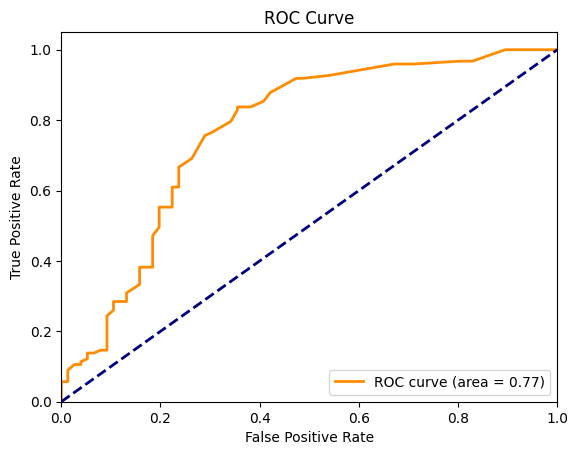

In [29]:
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_dt:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

1-A curva laranja mostra a relação entre a Taxa de Verdadeiros Positivos (True Positive Rate, TPR) e a Taxa de Falsos Positivos (False Positive Rate, FPR) para diferentes limiares de classificação.
O fato da curva estar acima da linha diagonal (linha tracejada azul) indica que o modelo tem um desempenho melhor do que o puro acaso. A linha azul representa um classificador aleatório, onde a taxa de verdadeiros positivos seria igual à taxa de falsos positivos.

2-Um AUC de 0,81 sugere que o modelo tem 81% de chance de distinguir corretamente entre uma startup que será vendida e uma que não será vendida.